# Spotify Analisis

## Informacion de kaggle : [link](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019)


Content
- artist: Name of the Artist.
- song: Name of the Track.
- duration_ms: Duration of the track in milliseconds.
- explicit: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
- year: Release Year of the track.
- popularity: The higher the value the more popular the song is.
- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
- key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal -
- content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- genre: Genre of the track.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv(r"C:\Users\crist\OneDrive\Desktop\Proyectos\Entrega 2\Entrega 2\Spotify-2000 (3).csv")

df.head()

,Index,Title,Artist,Top_Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


## Data frame info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Index         1994 non-null   int64 
 1   Title         1994 non-null   object
 2   Artist        1994 non-null   object
 3   Top_Genre     1994 non-null   object
 4   Year          1994 non-null   int64 
 5   BPM           1994 non-null   int64 
 6   Energy        1994 non-null   int64 
 7   Danceability  1994 non-null   int64 
 8   Loudness      1994 non-null   int64 
 9   Liveness      1994 non-null   int64 
 10  Valence       1994 non-null   int64 
 11  Duration      1994 non-null   object
 12  Acousticness  1994 non-null   int64 
 13  Speechiness   1994 non-null   int64 
 14  Popularity    1994 non-null   int64 
dtypes: int64(11), object(4)
memory usage: 233.8+ KB


In [5]:
df.isna().sum()

Index           0
Title           0
Artist          0
Top_Genre       0
Year            0
BPM             0
Energy          0
Danceability    0
Loudness        0
Liveness        0
Valence         0
Duration        0
Acousticness    0
Speechiness     0
Popularity      0
dtype: int64

In [6]:
def cantidad_valor(data,):
    return len(data.value_counts())

conteo_unico = {}

for i in df.columns:

    conteo_unico[str(i)]= cantidad_valor(df[str(i)])
    


Ninguno de estas informaciones se deberia considerar como categoria unica hasta el momento por la cantidad de valores que tienen

In [7]:
conteo_unico

{'Index': 1994,
 'Title': 1958,
 'Artist': 731,
 'Top_Genre': 149,
 'Year': 63,
 'BPM': 145,
 'Energy': 98,
 'Danceability': 84,
 'Loudness': 23,
 'Liveness': 94,
 'Valence': 97,
 'Duration': 350,
 'Acousticness': 100,
 'Speechiness': 37,
 'Popularity': 81}

In [8]:
df[df["Title"].duplicated()][["Title","Artist"]]

,Title,Artist
230,Feeling Good,Michael Bublé
293,Hurt,Johnny Cash
356,Sunrise,Simply Red
371,One,Johnny Cash
501,Home Again,Michael Kiwanuka
532,Diamonds,The Boxer Rebellion
581,Home,Dotan
689,Human,Rag'n'Bone Man
700,Sorry,Nothing But Thieves
704,Amsterdam,Nothing But Thieves


In [9]:
df["Title_artist"]=(df["Title"]).astype(str)+"-"+(df["Artist"]).astype(str)

Ya que los titulos duplicados eran con diferentes artistas por ende el nombre es normal y los consideraremos para separarlos 


In [10]:
df["Title_artist"].duplicated().sum()

0

Ahora el indice al tener un id que es el TItle_artist se puede eliminar

In [11]:
df.drop(columns=["Index"],inplace=True)

In [12]:
print(df.describe())

              Year          BPM       Energy  Danceability     Loudness  \
count  1994.000000  1994.000000  1994.000000   1994.000000  1994.000000   
mean   1992.992979   120.215647    59.679539     53.238215    -9.008526   
std      16.116048    28.028096    22.154322     15.351507     3.647876   
min    1956.000000    37.000000     3.000000     10.000000   -27.000000   
25%    1979.000000    99.000000    42.000000     43.000000   -11.000000   
50%    1993.000000   119.000000    61.000000     53.000000    -8.000000   
75%    2007.000000   136.000000    78.000000     64.000000    -6.000000   
max    2019.000000   206.000000   100.000000     96.000000    -2.000000   

          Liveness      Valence  Acousticness  Speechiness  Popularity  
count  1994.000000  1994.000000   1994.000000  1994.000000  1994.00000  
mean     19.012036    49.408726     28.858074     4.994985    59.52658  
std      16.727378    24.858212     29.011986     4.401566    14.35160  
min       2.000000     3.000000 

Para el primer analisis vamos a ver las distribuciones de la variable oportunidad debido a que es una variable que me gustaria estudiarla, en la informacion del data set 

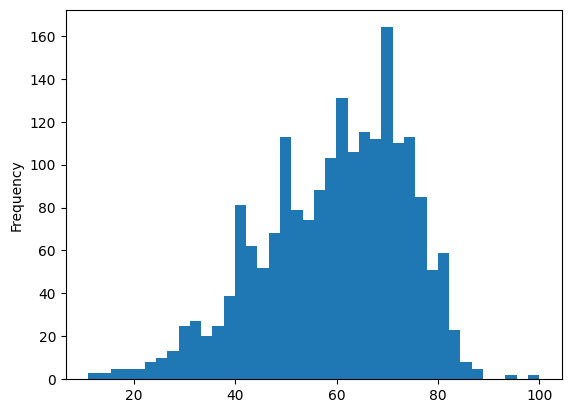

In [13]:
df["Popularity"].plot.hist(bins=40)
plt.show()

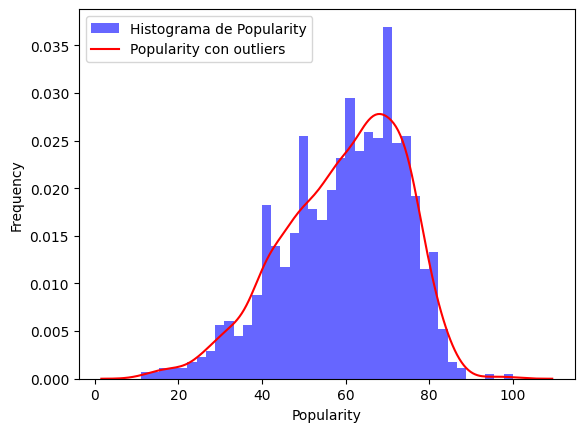

In [14]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Dibujar el histograma en el eje con densidad
df["Popularity"].plot.hist(bins=40, ax=ax, alpha=0.6, color='blue', label='Histograma de Popularity', density=True)

# Dibujar la densidad de KDE en el mismo eje
sns.kdeplot(df["Popularity"], color="red", label="Popularity con outliers", ax=ax)

# Añadir leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

<Axes: >

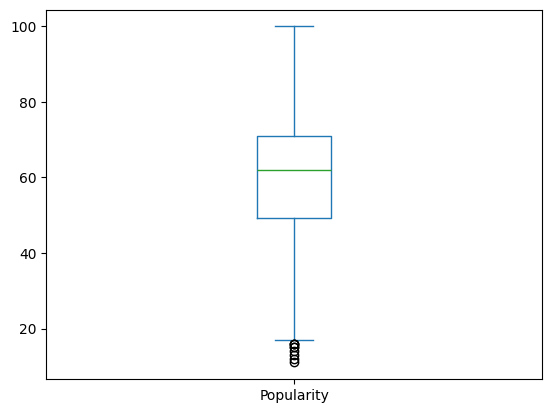

In [15]:
df["Popularity"].plot.box()

In [16]:
shapiro_test = stats.shapiro(df["Popularity"])
print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("\nShapiro-Wilk: No se rechaza la hipótesis nula (los datos parecen seguir una distribución normal).")
else:
    print("\nShapiro-Wilk: Se rechaza la hipótesis nula (los datos no siguen una distribución normal).")


Shapiro-Wilk Test:
Statistic: 0.9748881778138689
p-value: 3.192317554243117e-18

Shapiro-Wilk: Se rechaza la hipótesis nula (los datos no siguen una distribución normal).


In [17]:
Q1 = np.percentile(df["Popularity"],25)
Q2 = np.percentile(df["Popularity"],50)
Q3 = np.percentile(df["Popularity"],75)
RIQ = Q3 - Q1

In [18]:
RIQ

21.75

In [19]:
lower_bound = Q1-1.5*RIQ
upper_bound = Q3+1.5*RIQ


In [20]:
upper_bound

103.625

In [21]:
pop_sin_outlier = df[(df["Popularity"]<upper_bound) &(df["Popularity"]>lower_bound)]

<Axes: xlabel='Popularity', ylabel='Density'>

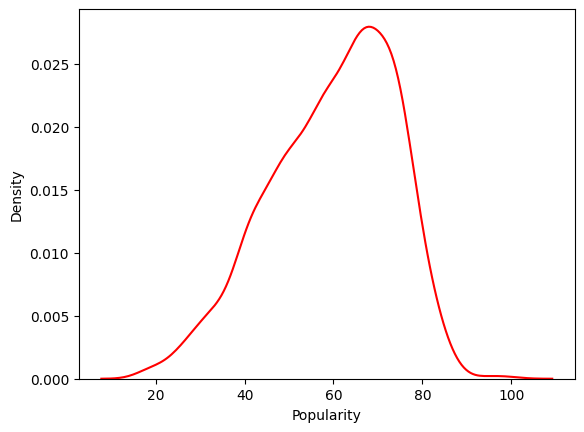

In [22]:
sns.kdeplot(pop_sin_outlier["Popularity"],color="red",label="Popularity sin outliers")

In [23]:
shapiro_test = stats.shapiro(pop_sin_outlier["Popularity"])
print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("\nShapiro-Wilk: No se rechaza la hipótesis nula (los datos parecen seguir una distribución normal).")
else:
    print("\nShapiro-Wilk: Se rechaza la hipótesis nula (los datos no siguen una distribución normal).")


Shapiro-Wilk Test:
Statistic: 0.9770125382260472
p-value: 2.4563562854617273e-17

Shapiro-Wilk: Se rechaza la hipótesis nula (los datos no siguen una distribución normal).


### se rechaza por ende no sigue una distribucion normal

In [24]:
df_numeric = df.select_dtypes(include=[np.number])

correlation_matrix = df_numeric.corr()

In [25]:
correlation_matrix

,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Acousticness,Speechiness,Popularity
Year,1.000000,0.012570,0.147235,0.077493,0.343764,0.019017,-0.166163,-0.132946,0.054097,-0.158962
BPM,0.012570,1.000000,0.156644,-0.140602,0.092927,0.016256,0.059653,-0.122472,0.085598,-0.003181
Energy,0.147235,0.156644,1.000000,0.139616,0.735711,0.174118,0.405175,-0.665156,0.205865,0.103393
Danceability,0.077493,-0.140602,0.139616,1.000000,0.044235,-0.103063,0.514564,-0.135769,0.125229,0.144344
Loudness,0.343764,0.092927,0.735711,0.044235,1.000000,0.098257,0.147041,-0.451635,0.125090,0.165527
Liveness,0.019017,0.016256,0.174118,-0.103063,0.098257,1.000000,0.050667,-0.046206,0.092594,-0.111978
Valence,-0.166163,0.059653,0.405175,0.514564,0.147041,0.050667,1.000000,-0.239729,0.107102,0.095911
Acousticness,-0.132946,-0.122472,-0.665156,-0.135769,-0.451635,-0.046206,-0.239729,1.000000,-0.098256,-0.087604
Speechiness,0.054097,0.085598,0.205865,0.125229,0.125090,0.092594,0.107102,-0.098256,1.000000,0.111689
Popularity,-0.158962,-0.003181,0.103393,0.144344,0.165527,-0.111978,0.095911,-0.087604,0.111689,1.000000


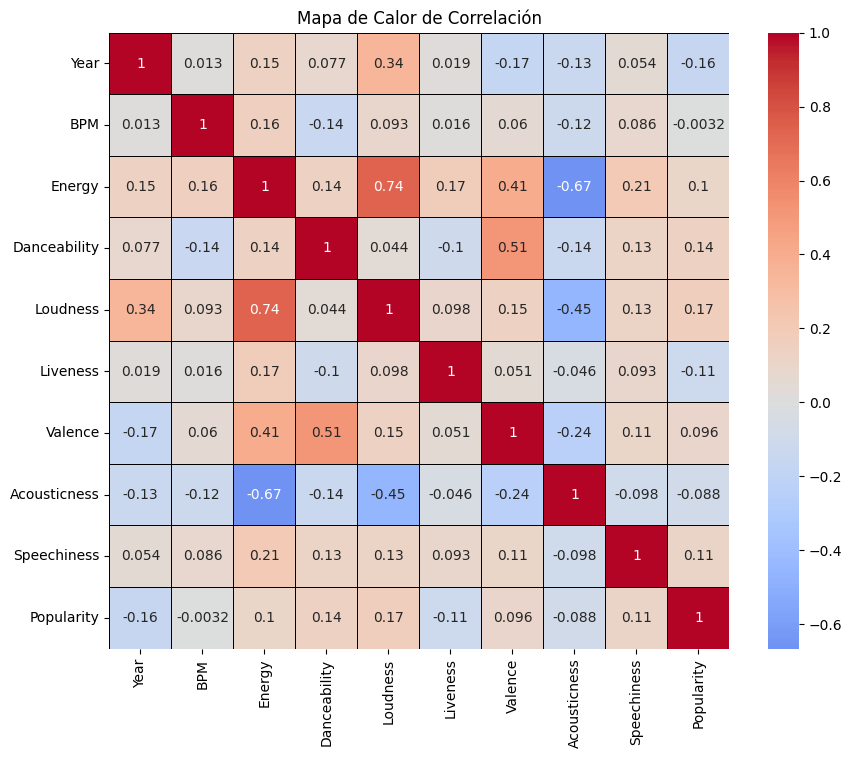

In [26]:
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')

# Añadir título
plt.title('Mapa de Calor de Correlación')

# Mostrar el gráfico
plt.show()

In [27]:
scaler = StandardScaler()

# Ajustar el scaler a los datos y transformarlos
X_scaled = scaler.fit_transform(df_numeric)

# Convertir el resultado a un DataFrame para una mejor visualización
X_scaled_df = pd.DataFrame(X_scaled, columns=df_numeric.columns)

In [28]:
X_scaled_df

,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Acousticness,Speechiness,Popularity
0,0.683156,1.312739,-1.340009,-0.015521,-1.368667,-0.479098,0.748080,2.245908,-0.453358,0.799653
1,0.434894,0.527616,0.872304,-0.210991,-0.546064,-0.120314,1.271177,-0.408833,0.455637,-1.430623
2,0.496960,1.705301,0.420812,0.831514,0.002338,-0.718286,0.104268,-0.925990,2.728126,0.660261
3,0.869353,1.883738,1.639841,-0.667086,1.373342,-0.957475,-0.499305,-0.994944,-0.226109,1.148133
4,0.559025,-0.507320,1.007752,0.310261,1.099141,-0.538895,1.512607,-0.960467,-0.453358,-0.036701
...,...,...,...,...,...,...,...,...,...,...
1989,-2.171857,-0.935569,-1.746352,1.092140,-0.820265,-0.479098,0.909033,1.901137,0.455637,0.242084
1990,-2.171857,1.955113,0.736856,-1.123182,0.276539,3.407722,1.834513,1.521888,0.228389,0.660261
1991,-2.109792,1.705301,0.917453,-0.015521,0.002338,0.716847,1.914989,1.556365,0.455637,1.008741
1992,-2.109792,1.919426,-1.520606,-0.536773,-1.094466,-0.718286,0.426174,0.866822,-0.226109,0.381476


In [29]:
 X_scaled_df.corr()

,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Acousticness,Speechiness,Popularity
Year,1.000000,0.012570,0.147235,0.077493,0.343764,0.019017,-0.166163,-0.132946,0.054097,-0.158962
BPM,0.012570,1.000000,0.156644,-0.140602,0.092927,0.016256,0.059653,-0.122472,0.085598,-0.003181
Energy,0.147235,0.156644,1.000000,0.139616,0.735711,0.174118,0.405175,-0.665156,0.205865,0.103393
Danceability,0.077493,-0.140602,0.139616,1.000000,0.044235,-0.103063,0.514564,-0.135769,0.125229,0.144344
Loudness,0.343764,0.092927,0.735711,0.044235,1.000000,0.098257,0.147041,-0.451635,0.125090,0.165527
Liveness,0.019017,0.016256,0.174118,-0.103063,0.098257,1.000000,0.050667,-0.046206,0.092594,-0.111978
Valence,-0.166163,0.059653,0.405175,0.514564,0.147041,0.050667,1.000000,-0.239729,0.107102,0.095911
Acousticness,-0.132946,-0.122472,-0.665156,-0.135769,-0.451635,-0.046206,-0.239729,1.000000,-0.098256,-0.087604
Speechiness,0.054097,0.085598,0.205865,0.125229,0.125090,0.092594,0.107102,-0.098256,1.000000,0.111689
Popularity,-0.158962,-0.003181,0.103393,0.144344,0.165527,-0.111978,0.095911,-0.087604,0.111689,1.000000


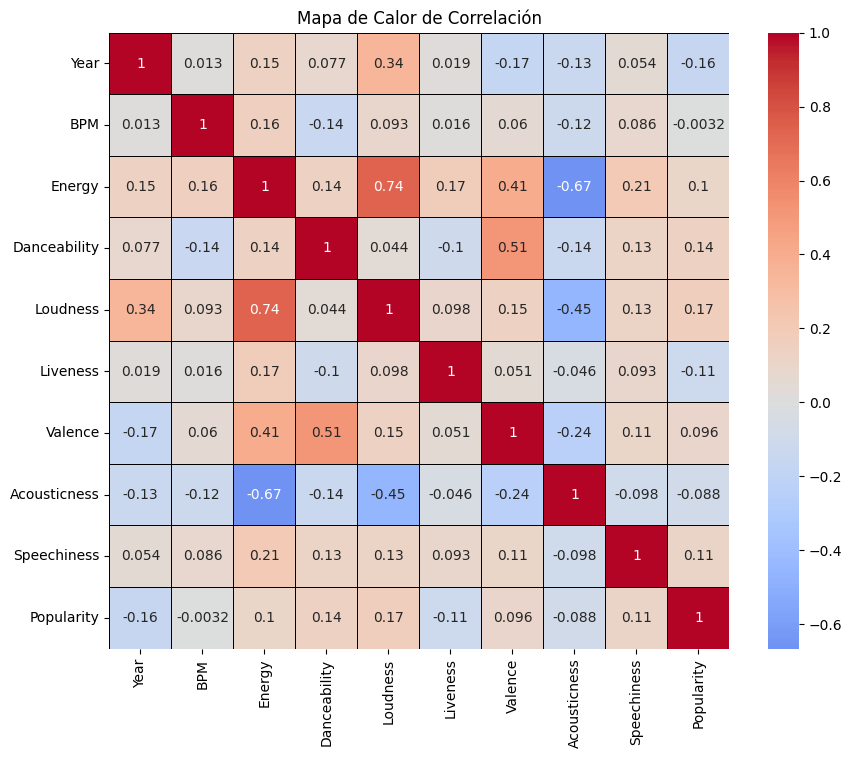

In [30]:
correlation_matrix = X_scaled_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')

# Añadir título
plt.title('Mapa de Calor de Correlación')

# Mostrar el gráfico
plt.show()

In [36]:
X_scaled_df=df_numeric.drop(columns=["Year"])

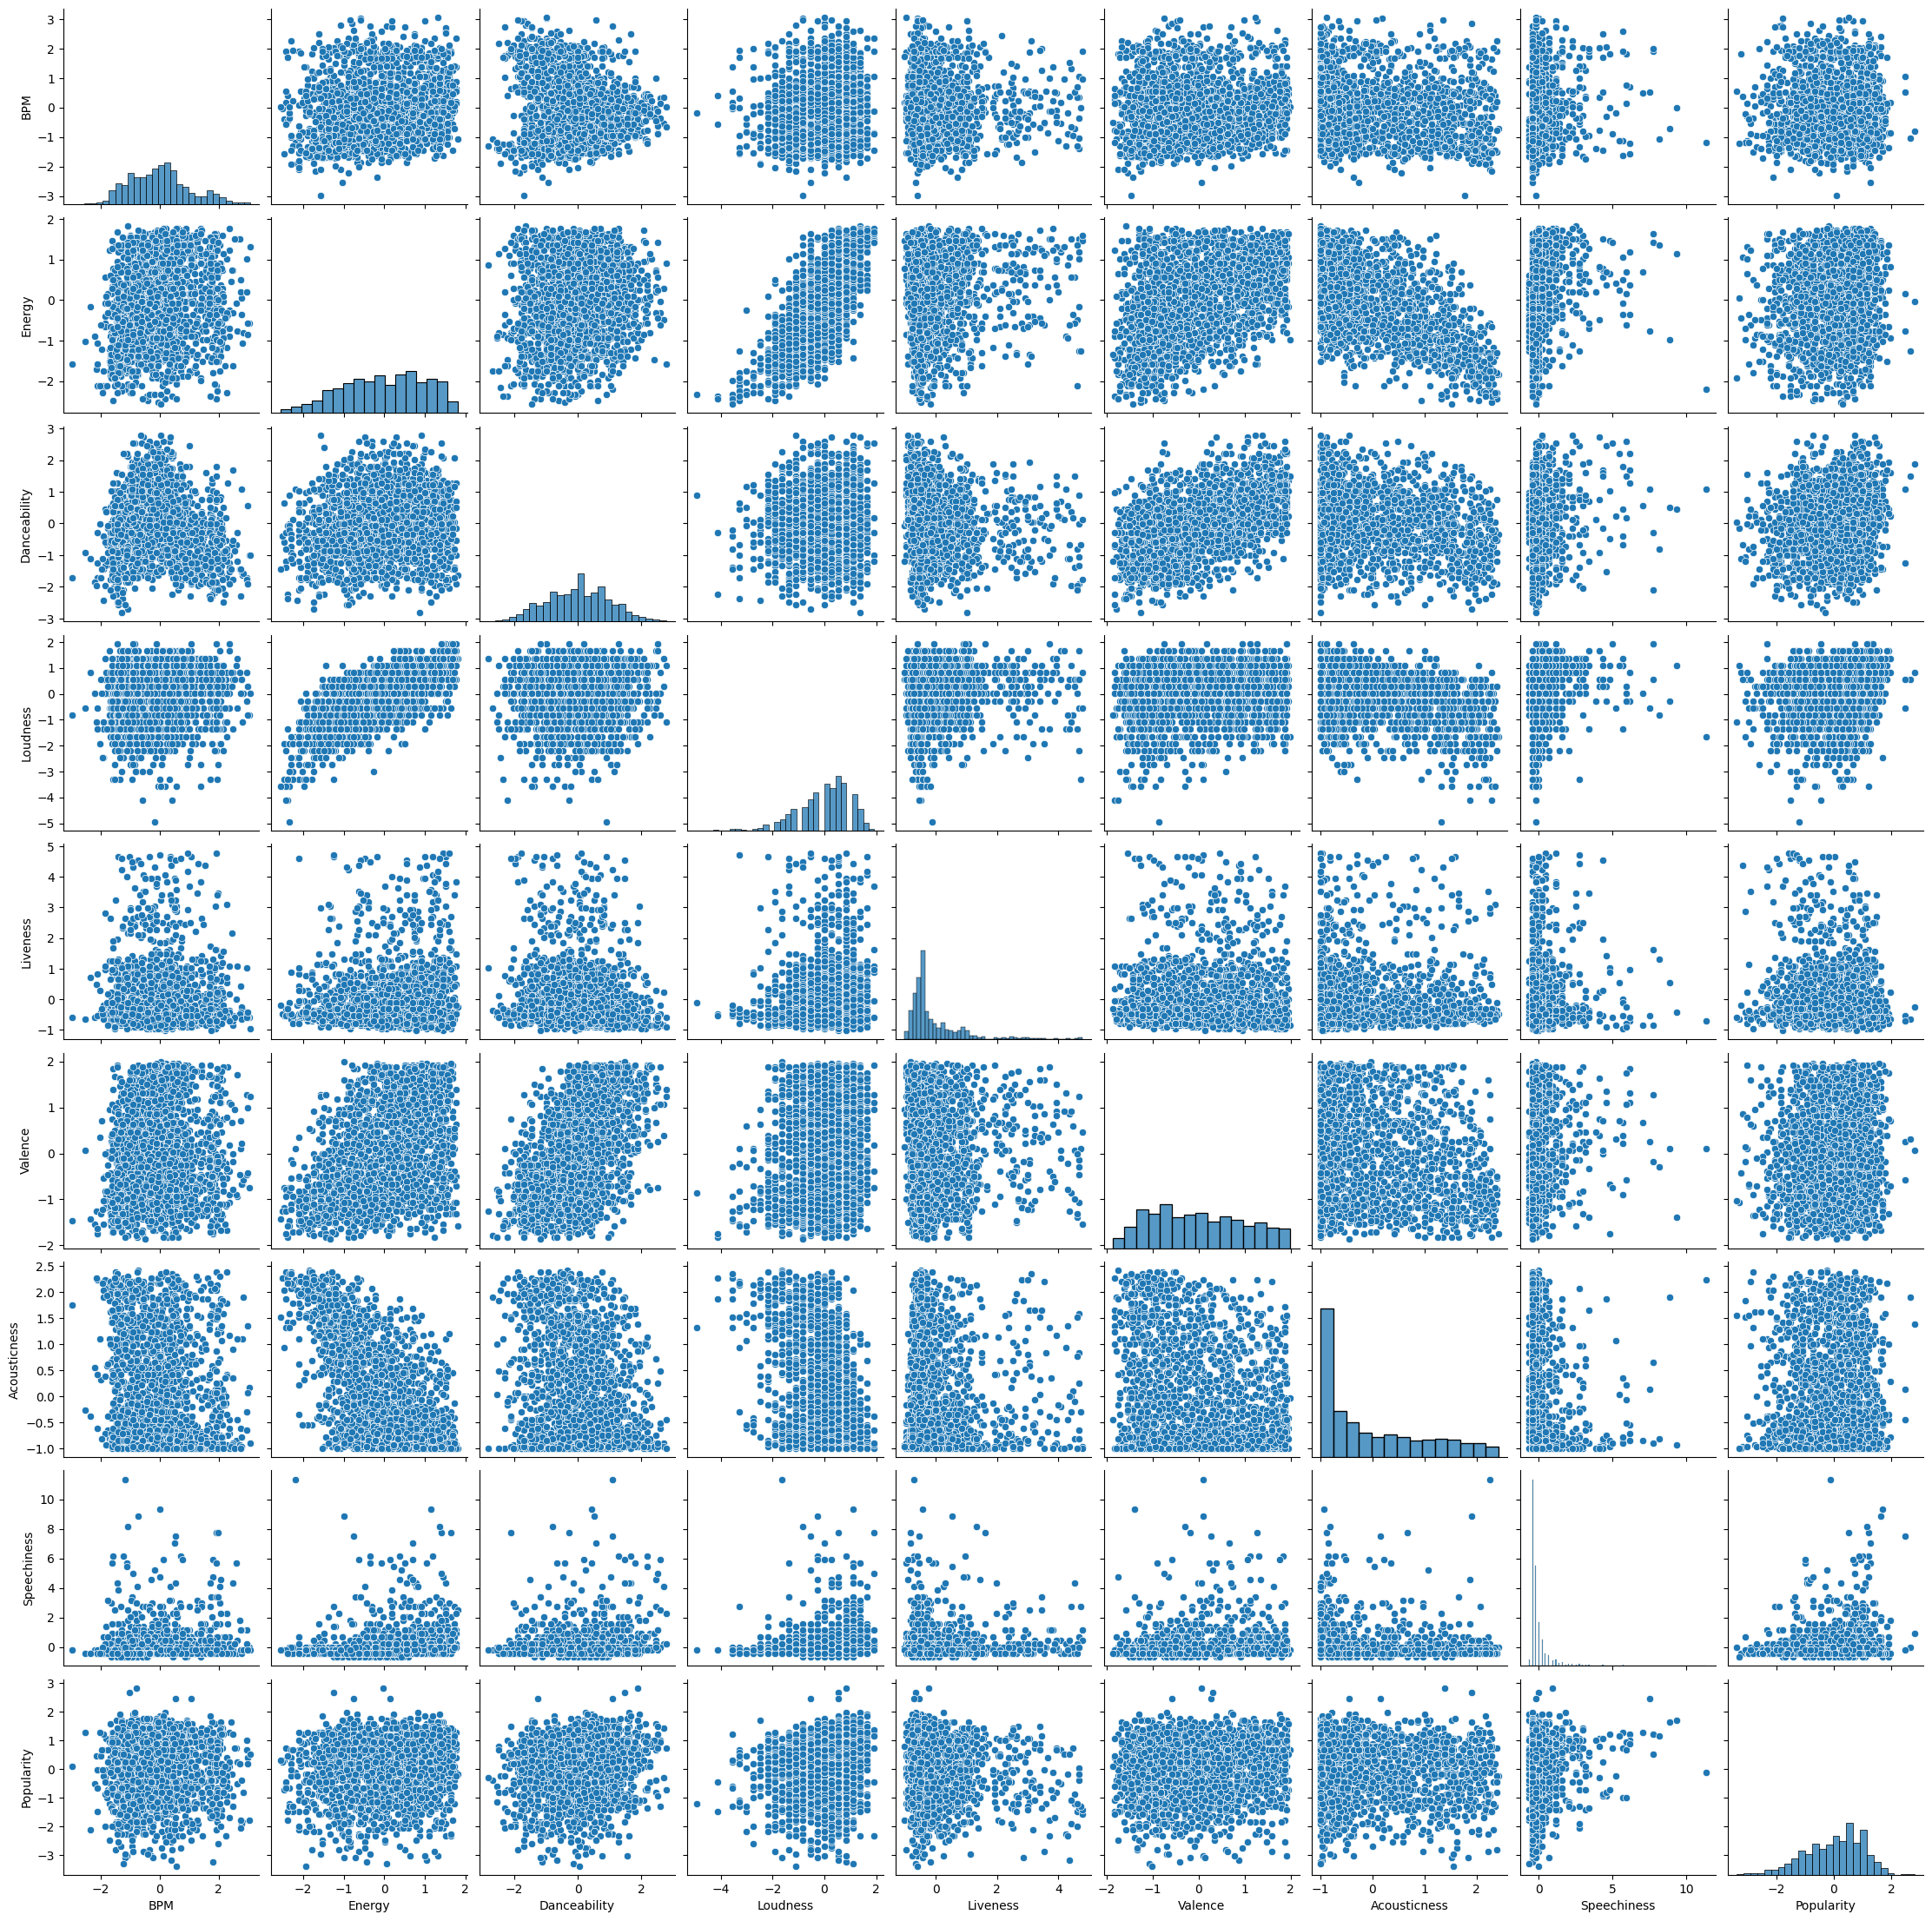

In [33]:
sns.pairplot(X_scaled_df[['BPM', 'Energy', 'Danceability', 'Loudness', 'Liveness',
       'Valence', 'Acousticness', 'Speechiness', 'Popularity']])

No se nota una relacion tan directa la unica que puede existir seria loudness y energia , ademas de energia y acousticness que es negativa

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score


X = X_scaled_df.drop(columns="Popularity", axis=1)
y = X_scaled_df["Popularity"]

X_train,X_test,y_train,y_test = train_test_split(X, 
                                                 y, 
                                                 test_size=0.2, 
                                                 random_state=9)

linear=LinearRegression()
linear.fit(X_train,y_train)

pred_y= linear.predict(X_test)

print("MSE:",MSE(y_test,pred_y))

print("RMSE:",MSE(y_test,pred_y)**(1/2))

r2 = r2_score(y_test, pred_y)
print(f'R^2: {r2}')


coefficients = linear.coef_
intercept = linear.intercept_

# Crear un DataFrame para mostrar los coeficientes con los nombres de las columnas
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Imprimir los coeficientes y la intersección
print("Coeficientes e Intersección del Modelo:")
print(coef_df)
print("Intersección:", intercept)


MSE: 201.76269064768334
RMSE: 14.204319436273016
R^2: 0.016368949895942286
Coeficientes e Intersección del Modelo:
        Feature  Coefficient
0           BPM    -0.015152
1        Energy    -0.074757
2  Danceability     0.098747
3      Loudness     0.966991
4      Liveness    -0.102451
5       Valence     0.021715
6  Acousticness    -0.021425
7   Speechiness     0.310497
Intersección: 69.25938771873868


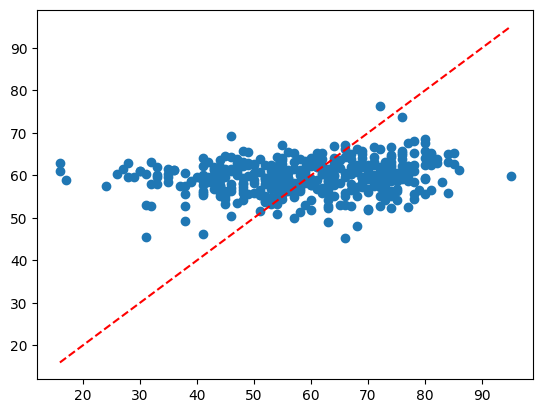

In [42]:
plt.scatter(y_test,pred_y)



min_val = min(min(y_test), min(pred_y))
max_val = max(max(y_test), max(pred_y))

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

plt.show()

Ya con esto entendemos que la linearidad no es el camino para poder producit la popularidad intentaremos con modelos no lineares 

In [59]:

#MACHINE LEARNING WITH TREE-BASED MODELS IN PYTHON
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=9)
params_dt = {'max_depth': [3,4,5, 6],
             'min_samples_leaf': [0.04, 0.06, 0.08],
             'max_features': [0.2, 0.4,0.6, 0.8]}


grid_dt = GridSearchCV(estimator=dt, param_grid = params_dt ,scoring='neg_mean_squared_error' ,cv=10 , n_jobs=-1)
# Fit 'grid_dt' to the training 
grid_dt.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=9), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='neg_mean_squared_error')

In [72]:
best_model = grid_dt.best_estimator_
# Predict the test set 
y_pred_dt = best_model.predict(X_test)
# Evaluate the test set 
rmse_test = MSE(y_test, y_pred_dt)**(1/2)
# Print the test set 
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 14.24


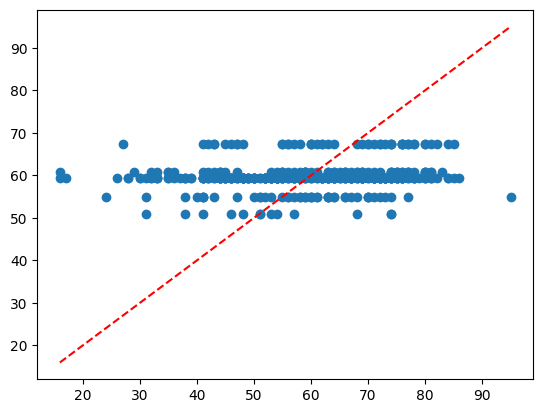

In [75]:
plt.scatter(y_test,y_pred_dt)



min_val = min(min(y_test), min(y_pred_dt))
max_val = max(max(y_test), max(y_pred_dt))

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

plt.show()

the tree es muy similar al modelo de regresion lineal

In [79]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state= 9)

params_rf = {'n_estimators': [300, 400, 500],
             'max_depth': [4, 6, 8],
             'min_samples_leaf': [0.1, 0.2],
             'max_features': ['log2', 'sqrt']}

grid_rf = GridSearchCV(estimator=rf,param_grid=params_rf,cv=3,scoring='neg_mean_squared_error',verbose=1,n_jobs=-1)


grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=9), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [81]:
best_model = grid_rf.best_estimator_
# Predict the test set labels
y_pred_rf = best_model.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred_rf)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 14.18


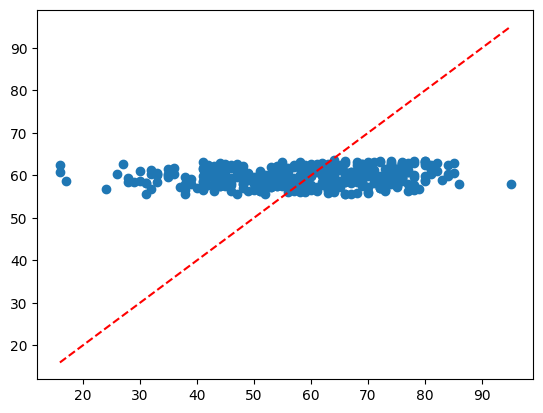

In [82]:
plt.scatter(y_test,y_pred_rf)



min_val = min(min(y_test), min(y_pred_rf))
max_val = max(max(y_test), max(y_pred_rf))

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

plt.show()

Muy baja la mejora de lo unico que logro fue seguir la media de los datos finales pero como popularidad igual es muy variable no nos sirve

In [104]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

params_poly = {'poly__degree': [2, 3, 4, 5, 6]}


grid_poly = GridSearchCV(estimator=pipeline, param_grid=params_poly, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_poly.fit(X_train, y_train)

print("Mejor grado de polinomio:", grid_poly.best_params_)
print("Mejor error (negativo):", (-grid_poly.best_score_)**(1/2))



best_model = grid_poly.best_estimator_
# Predict the test set labels
y_pred_pol = best_model.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred_pol)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Mejor grado de polinomio: {'poly__degree': 2}
Mejor error (negativo): 14.093359723403191
Test set RMSE of rf: 14.29


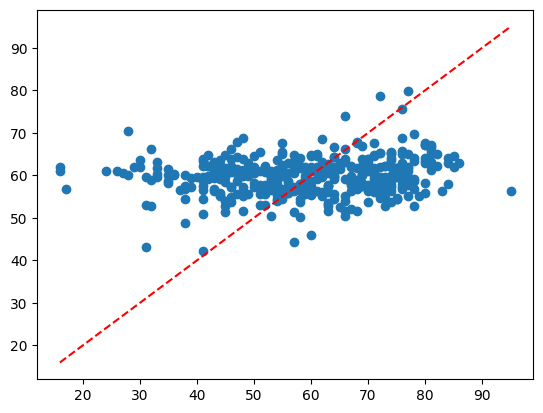

In [105]:
plt.scatter(y_test,y_pred_pol)



min_val = min(min(y_test), min(y_pred_pol))
max_val = max(max(y_test), max(y_pred_pol))

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

plt.show()

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gbm_model.fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)
rmse_test = MSE(y_test, y_pred_gbm)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))


Test set RMSE of rf: 14.48


In [110]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=1000)
nn_model.fit(X_train, y_train)
y_predlm = nn_model.predict(X_test)

rmse_test = MSE(y_test, y_predlm)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))



Test set RMSE of rf: 15.59
